<center><h1>Feature Engineering & Advanced Preprocessing</h1></center>

# 1. Information

Data Set Information:

This file is part of APS Failure and Operational Data for Scania Trucks.

Copyright (c) <2016>

This program (APS Failure and Operational Data for Scania Trucks) is
free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program. If not, see <[Web Link]>.

# 2. Fetching Data:

## 2.1 Import packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import missingno as msno

from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile
from sklearn.feature_selection import mutual_info_classif, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import roc_auc_score, mean_squared_error, \
    accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import LocalOutlierFactor

import category_encoders as ce

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

plt.style.use('ggplot')
%matplotlib inline

## 2.2 Import data

In [2]:
data_train=pd.read_csv("aps_failure_training_set.csv", skiprows=19,na_values='na')
data_train.shape

(60000, 171)

In [3]:
data_test=pd.read_csv("aps_failure_test_set.csv", skiprows=19,na_values='na')
data_test.shape

(16000, 171)

In [4]:
data=pd.concat([data_train, data_test], axis=0)
data.shape

(76000, 171)

In [5]:
data.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,299160.0,305200.0,283680.0,NaN,NaN,NaN,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.0,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,NaN,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,366560.0,NaN,NaN,NaN,NaN,NaN,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,NaN,NaN,NaN,2291079.36,0.0,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,NaN,0.0,3646660.0,NaN,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,28804.0,160176.0,139730.0,137160.0,13064

In [6]:
data.tail(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,5486.0,704012.0,3220278.0,1297498.0,76170.0,7206.0,2276100.0,0.0,0.0,0.0,0.0,0.0,4547950.0,3779700.0,973592.0,669608.0,0.0,0.0,1536.0,0.0,6374.0,1194.0,0.0,0.0,0.0,0.0,0.0,214014.0,3876498.0,868212.0,351926.0,0.0,4622.0,2328.0,2176.0,3048.0,321282.0,4976848.0,346.0,0.0,0.0,0.0,1591426.0,1335362.0,346644.0,248082.0,183738.0,162876.0,299794.0,1141712.0,1016.0,0.0,5522314.0,6476.0,8936.0,1626.0,102.0,2276100.0,68662.0,475928.0,493980.0,239020.0,228440.0,202320.0,194800.0,NaN,NaN,NaN,NaN,99940.0,81851.77,5522314.0,5522314.0,5510074.0,42112.0,1116.0,60896.0,674580.0,5310650.0,1209600.0,162502.0,2.0,138.0,0.0,4457943.36,0.0,847887.36,0.0,1192.0,0.0,0.0,0.0,94218.0,1403348.0,2787108.0,947254.0,67132.0,10262.0,1328.0,42.0,54.0,5522314.0,NaN,8922.0,1066.0,357990.0,397290.0,522352.0,3630086.0,384992.0,7896.0,56.0,0.0,1352.0,3336.0,4488552.0,1124612.0,0.0,64940.0,0.0,12.0,4521542.0,4596.0,1006.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40386.0,58588.0,23628.0,0.0,0.0,155596.0,23350.0,7124860.0,724280.0,30954.0,6854.0,0.0,0.0,10074490.0,1546.74,2054.0,883900.0,983308.0,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,6444.0,3308.0,2720.0,0.0,0.0,0.0,3740.0,0.0,0.0,0.0,1150.0,2790.0,14656.0,12242.0,7222.0,1338.0,0.0,0.0,0.0,0.0,66.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2114.0,10358.0,0.0,60.0,6.0,10.0,1012.0,14.0,2492.0,8878.0,0.0,0.0,0.0,10942.0,506.0,300.0,122.0,50.0,374.0,178.0,0.0,0.0,0.0,23062.0,8.0,18.0,34.0,0.0,3740.0,240.0,2932.0,4264.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7080.0,18.41,23062.0,23062.0,24920.0,38.0,0.0,2176.0,22860.0,12536.0,1209600.0,450.0,2.0,10.0,0.0,3330.24,0.0,8124.48,2.0,20.0,0.0,0.0,6376.0,1516.0,3394.0,1162.0,24.0,0.0,0.0,0.0,0.0,0.0,23062.0,0.0,1086.0,6.0,16.0,306.0,2504.0,8294.0,260.0,0.0,0.0,0.0,118.0,274.0,3938.0,220.0,0.0,52.0,0.0,0.0,3962.0,104.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,264.0,0.0,0.0,32.0,8.0,106.0,28.0,3500.0,340.0,11108.0,8.0,0.0,0.0,0.0,0.98,50.0,9354.0,2746.0,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,15062.0,1991298.0,2768440.0,329148.0,13124.0,990.0,2156280.0,0.0,0.0,0.0,0.0,0.0,4562338.0,3828492.0,1238380.0,578006.0,0.0,0.0,1828.0,0.0,8044.0,1130.0,0.0,0.0,0.0,0.0,0.0,1686138.0,3101858.0,315250.0,14816.0,0.0,5660.0,1544.0,2580.0,349324.0,3735962.0,1022956.0,36.0,0.0,0.0,0.0,1489006.0,1223696.0,459728.0,362492.0,301912.0,279664.0,498804.0,502756.0,4.0,0.0,5802262.0,26.0,2544.0,372.0,68.0,2156280.0,63754.0,817038.0,419172.0,225360.0,277120.0,300460.0,288340.0,NaN,NaN,NaN,NaN,131960.0,79635.97,5802262.0,5802262.0,5733332.0,38013.0,2688.0,84746.0,947380.0,5118062.0,1209600.0,194480.0,2.0,76.0,0.0,4694372.16,0.0,417673.

## 2.3 Data type analysis

In [7]:
numeric_types = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(data.select_dtypes(include=numeric_types).columns)
object_vars = list(data.select_dtypes(include=["object"]).columns)

In [8]:
data_num = data[numerical_vars].copy()
data_obj = data[object_vars].copy()

In [9]:
data_num.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,299160.0,305200.0,283680.0,NaN,NaN,NaN,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.0,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,NaN,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,366560.0,NaN,NaN,NaN,NaN,NaN,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,NaN,NaN,NaN,2291079.36,0.0,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,NaN,0.0,3646660.0,NaN,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,128.0,202.0,576.0,4.0,1234132.0,28804.0,160176.0,139730.0,137160.0,130640.0,NaN,NaN,NaN,Na

In [10]:
data_obj.head()

,class
0,neg
1,neg
2,neg
3,neg
4,neg


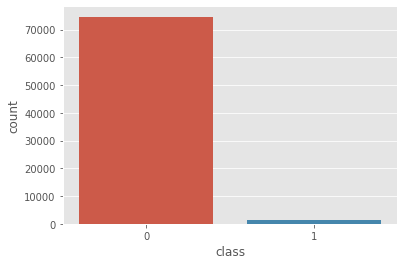

In [78]:
sns.countplot(x='class',data=data)

In [79]:
data=data.replace(to_replace ="pos", value =1)
data=data.replace(to_replace ="neg", value =0)

In [82]:
prct_missing = (data.isna().sum() / data.shape[0] * 100).round(2)
print(prct_missing.head())

class      0.00
aa_000     0.00
ab_000    77.23
ac_000     5.61
ad_000    24.79
dtype: float64


### Conclusion:
В датасете очень много Nan-ов и серьезный дисбаланс классов. Зато нет категориальных переменных, кроме целевой.

## 2.4 Baseline Modeling

In [13]:
def data_split_train_test(data, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['class'], axis=1),
    data['class'],
    test_size=test_size,
    stratify=data['class'],
    random_state=0)

    print("Train_shape:", X_train.shape, "Test shape:", X_test.shape)
    
    return X_train, X_test, y_train, y_test

In [14]:
data_num_wo_nan = data.dropna()

In [15]:
data_num_wo_nan.shape

(756, 171)

In [16]:
X_train, X_test, y_train, y_test = data_split_train_test(data_num_wo_nan)

Train_shape: (529, 170) Test shape: (227, 170)


### 2.4.1 Scaling

In [17]:
def scale_data(X_train, X_test, scaler_type="minmax"):
    if scaler_type=="minmax":
        scaler = MinMaxScaler()
    elif scaler_type=="std":
        scaler = StandardScaler()
    elif scaler_type=="robust":
        scaler = RobustScaler()
        
    scaler.fit(X_train)
    
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
        
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = scale_data(X_train, X_test, scaler_type="minmax")

In [18]:
model_LogR = LogisticRegression(solver="liblinear")
model_LogR.fit(X_train_scaled, y_train)
pred = model_LogR.predict(X_test_scaled)

In [19]:
def quality_report(prediction, actual, verbose=True):
    report_str = "Accuracy: \t {:.3f}\n" +\
                 "Precision: \t {:.3f}\n" +\
                 "Recall: \t {:.3f}\n" +\
                 "f1_score: \t {:.3f}\n" +\
                 "ROC-AUC: \t {:.3f}"
    
    acc = accuracy_score(prediction, actual)
    precision = precision_score(prediction, actual)
    recall = recall_score(prediction, actual)
    f1 = f1_score(prediction, actual)
    rocauc = roc_auc_score(prediction, actual)
    
    quality_list = [acc, precision, recall, f1, rocauc]
    
    if verbose:
        print("\n=== Quality Report ===")
        print(report_str.format(
            accuracy_score(prediction, actual),
            precision_score(prediction, actual),
            recall_score(prediction, actual),
            f1_score(prediction, actual),
            roc_auc_score(prediction, actual)
        ))
        print("======================\n")
    
    return quality_list

quality_list_baseline = quality_report(pred, y_test)


=== Quality Report ===
Accuracy: 	 0.969
Precision: 	 0.812
Recall: 	 0.963
f1_score: 	 0.881
ROC-AUC: 	 0.966



In [20]:
df_quality = pd.DataFrame(
    [quality_list_baseline],
    columns=["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"],
    index=["baseline"]
)
df_quality.round(3)

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.969,0.812,0.963,0.881,0.966


### Conclusion:
##### В качестве шкалировщика был применен метод *min-max*, так как большинство распределений смещены. 
##### Результаты по метрикам хорошие, но после выкидывания Nan-ов выборка стала очень маленькая. Вряд ли модель на такой маленькой выборке сможет хорошо обучиться.

## 2.5 Correlation analysis

In [21]:
def corr_feature_detect(data, threshold=0.8):
    
    corrmat = data.drop(['class'], axis=1).corr()

    corrmat = corrmat.abs().unstack().sort_values(ascending=False)

    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1]

    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
   
    correlated_feats = []

    for row in corrmat.values:
        f1, f2, corr_value = row

        if not ((f1 in correlated_feats) | (f2 in correlated_feats)):
            f1_feat_len = corrmat[(corrmat.feature1==f1) | (corrmat.feature2==f1)].shape[0]
            f2_feat_len = corrmat[(corrmat.feature1==f2) | (corrmat.feature2==f2)].shape[0]

            if f1_feat_len >= f2_feat_len:
                correlated_feats.append(f1)
            else:
                correlated_feats.append(f2)
    
    return correlated_feats

In [22]:
data_num_corr_features = corr_feature_detect(data, threshold=0.9)
print(data_num_corr_features)

['bb_000', 'bg_000', 'aa_000', 'cq_000', 'bu_000', 'cf_000', 'ad_000', 'cc_000', 'am_0', 'an_000', 'bq_000', 'bv_000', 'bo_000', 'bh_000', 'ah_000', 'ds_000', 'br_000', 'dn_000', 'ba_003', 'ee_003', 'ec_00', 'ag_006', 'aq_000', 'bn_000', 'dc_000', 'ap_000', 'do_000', 'ba_004', 'cs_005', 'ba_001', 'ak_000', 'cn_004', 'ao_000', 'by_000', 'bm_000', 'cs_003', 'dl_000', 'ag_003', 'ee_001']


In [23]:
data_num_corr_free = data.drop(data_num_corr_features, axis=1)

In [24]:
data_num_corr_free.head(10)

,class,ab_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_004,ag_005,ag_007,ag_008,ag_009,ai_000,aj_000,al_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_002,ba_005,ba_006,ba_007,ba_008,ba_009,bc_000,bd_000,be_000,bf_000,bi_000,bj_000,bk_000,bl_000,bp_000,bs_000,bt_000,bx_000,bz_000,ca_000,cb_000,cd_000,ce_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cr_000,cs_000,cs_001,cs_002,cs_004,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dm_000,dp_000,dq_000,dr_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ed_000,ee_000,ee_002,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,NaN,2.130706e+09,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,1007684.0,25896.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,415432.0,681504.0,1118814.0,3574.0,0.0,0.0,0.0,10.0,108.0,50.0,947550.0,799478.0,330760.0,353400.0,NaN,178540.0,76698.08,6599892.0,68656.0,54064.0,638360.0,1209600.0,246244.0,96.0,0.0,5245752.00,0.00,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,NaN,10476.0,1226.0,267998.0,428776.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32790.0,0.0,0.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2712.0,965866.0,1240520.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,NaN,0.000000e+00,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,516724.0,31642.0,0.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,199512.0,138668.0,165908.0,229652.0,87082.0,4708.0,86.0,454.0,364.0,350.0,688314.0,392208.0,341420.0,359780.0,NaN,6700.0,33057.51,3582034.0,260120.0,115626.0,6900.0,1209600.0,0.0,NaN,NaN,2291079.36,0.00,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1286736.0,336388.0,36294.0,5192.0,56.0,NaN,0.0,NaN,6160.0,796.0,164860.0,272956.0,301242.0,9148.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5936.0,0.0,0.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2334.0,664504.0,421400.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,NaN,2.280000e+02,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,292936.0,12016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,332340.0,135758.0,103552.0,81666.0,46.0,0.0,128.0,202.0,576.0,4.0,160176.0,139730.0,137160.0,130640.0,NaN,28000.0,41040.08,2678534.0,7466.0,22436.0,248240.0,1209600.0,63328.0,124.0,0.0,2322692.16,0.00,236099.52,0.0,0.0,0.0,0.0,0.0,33276.0,1102798.0,196502.0,10260.0,2422.0,28.0,0.0,6.0,NaN,3584.0,500.0,56362.0,100326.0,488302.0,16682.0,246.0,0.0,230.0,292.0,2180528.0,29188.0,22.0,20346.0,0.0,0.0,1494.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8138.0,0.0,0.0,10534.0,300240.0,48028.0,0.0,0.0,0.0,0.0,1040120.0,1020.0,262032.0,277378.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,0.0,7.000000e+01,0.0,10.0,0.0,0.0,0.0,2212.0,3232.0,0.0,0.0,0.0,0.0,0.0,642.0,0.0,0.0,0.0,0.0,60.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2038.0,5596.0,0.0,64.0,6.0,6.0,914.0,76.0,2478.0,2398.0,1692.0,0.0,0.0,6176.0,304.0,406.0,216.0,16.0,0.0,0.0,2.0,12.0,0.0,0.0,7632.0,3090.0,NaN,NaN,NaN,10580.0,12.69,21772.0,50.0,1994.0,21400.0,1209600.0,302.0,6.0,0.0,2135.04,0.00,4525.44,2.0,16.0,0.0,52.0,2544.0,1894.0,822.0,152.0,0.0,0.0,0.0,2.0,2.0,0.0,1032.0,6.0,24.0,692.0,388.0,0.0,0.0,0.0,138.0,8.0,1666.0,72.0,0.0,12.0,0.0,0.0,76.0,62.0,0.0,0.0,0.0,0

In [25]:
data.shape, data_num_corr_free.shape

((76000, 171), (76000, 132))

### Conclusion:
Часть признаков имеет сильную взаимную корреляцию. Потенциально их можно выкинуть, чтобы упростить работу модели и уменьшить шум.

## 2.6 Missing values analysis

In [26]:
prct_missing = (data.isna().sum() / data.shape[0] * 100).round(2)
print(prct_missing.head())
print("\nFeatures with more then 40% NaNs: {}/{}".format(len(prct_missing[prct_missing>40]), len(prct_missing)))

class      0.00
aa_000     0.00
ab_000    77.23
ac_000     5.61
ad_000    24.79
dtype: float64

Features with more then 40% NaNs: 9/171


In [27]:
prct_missing_corr = (data_num_corr_free.isna().sum() / data_num_corr_free.shape[0] * 100).round(2)
print(prct_missing_corr.head())
print("\nFeatures with more then 40% NaNs: {}/{}".format(len(prct_missing_corr[prct_missing>40]), len(prct_missing)))

class      0.00
ab_000    77.23
ac_000     5.61
ae_000     4.20
af_000     4.20
dtype: float64

Features with more then 40% NaNs: 4/171


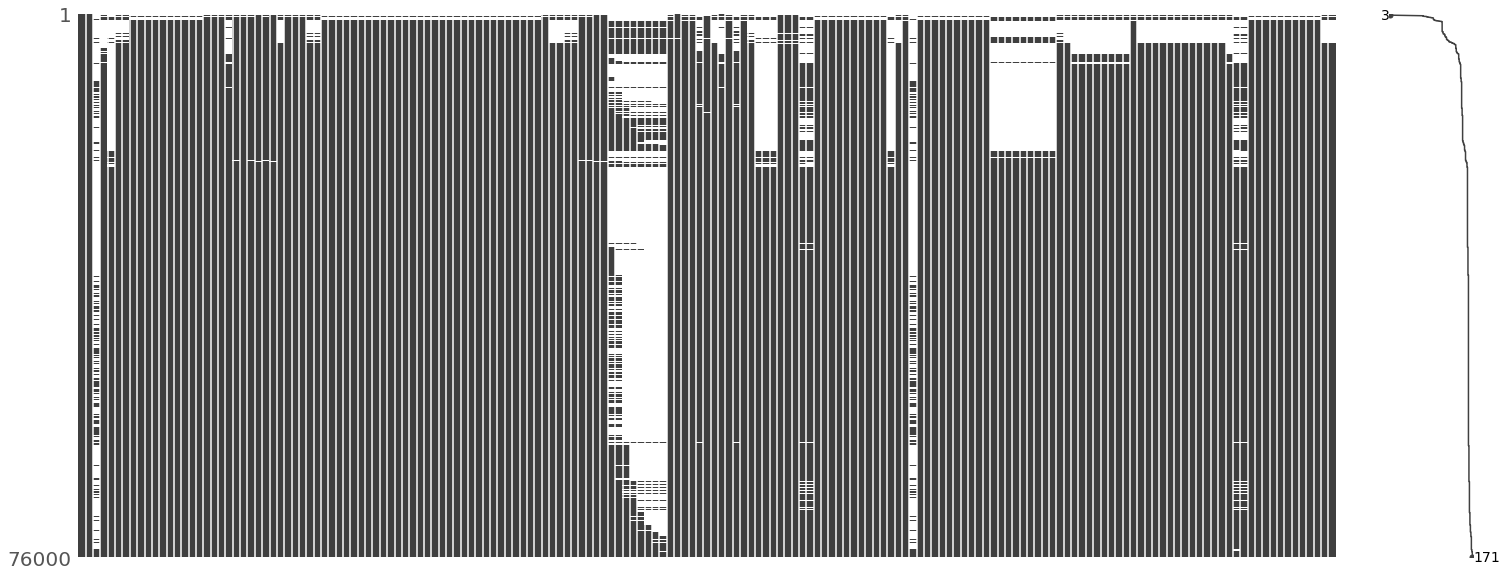

In [28]:
msno.matrix(data, sort='ascending')

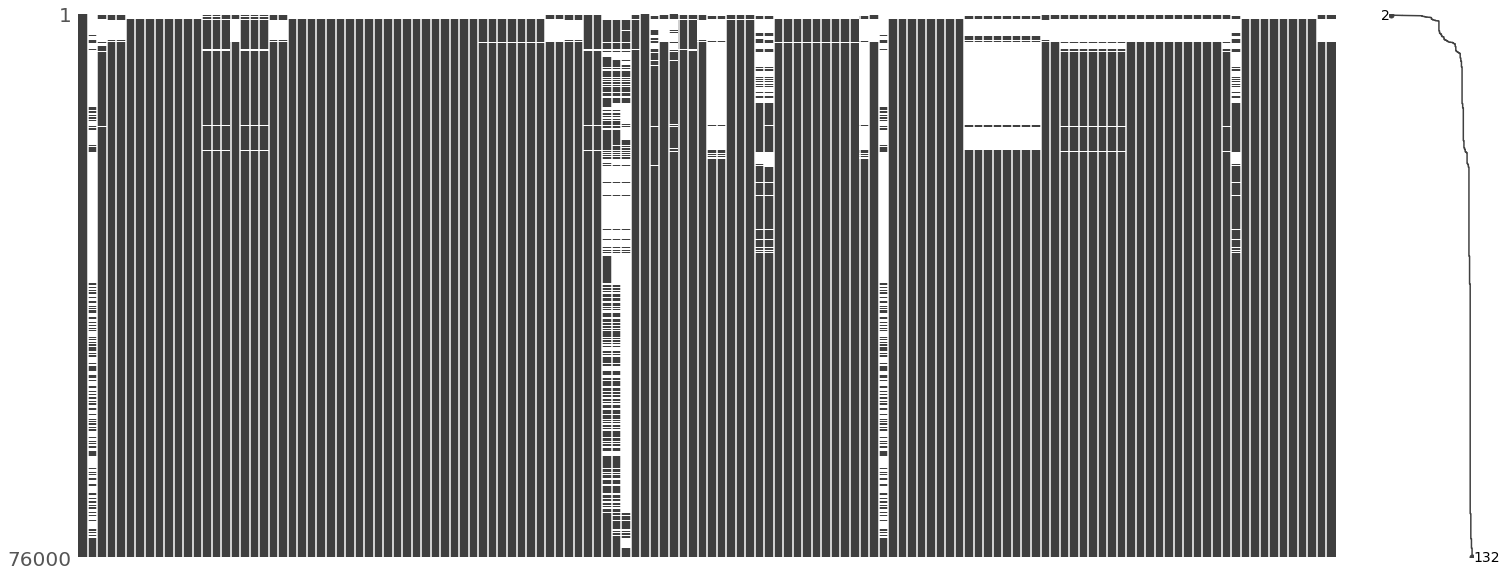

In [29]:
msno.matrix(data_num_corr_free, sort='ascending')

Признаки, где количество пропущенных значений больше 40 % можно выбросить.

In [30]:
data_num_corr_nan_free = data_num_corr_free.drop(list(prct_missing_corr[prct_missing_corr>40].index), axis=1).copy()
data_num_nan_free = data.drop(list(prct_missing[prct_missing>40].index), axis=1).copy()

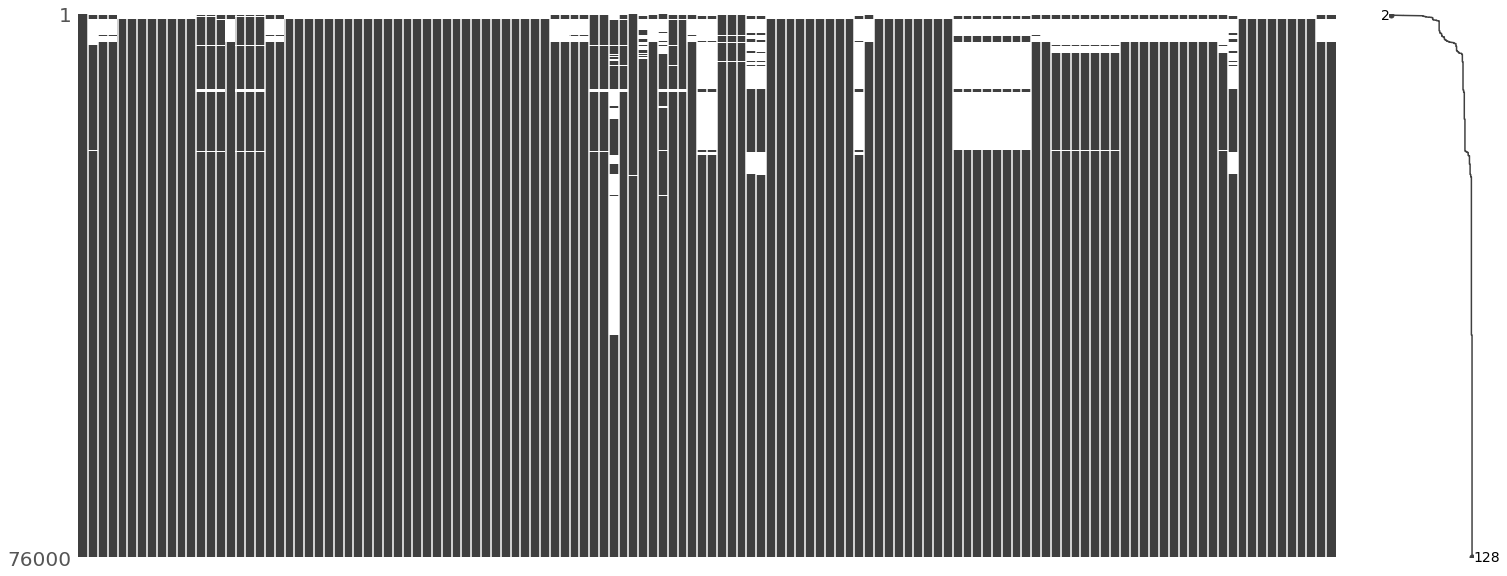

In [31]:
msno.matrix(data_num_corr_nan_free, sort='ascending')

In [32]:
def fill_NA(data, strategy='mean', NA_cols=[]):
    data_copy = data.copy(deep=True)
    for c in NA_cols:
        if data_copy[c].isnull().sum()>0:
            if strategy=='mean':
                data_copy[c] = data_copy[c].fillna(data[c].mean())
            elif strategy=='median':
                data_copy[c] = data_copy[c].fillna(data[c].median())
            elif strategy=='mode':
                data_copy[c] = data_copy[c].fillna(data[c].mode()[0])
    return data_copy

In [33]:
data_num_corr_nan_free = fill_NA(data_num_corr_nan_free, strategy='median', NA_cols=data_num_corr_nan_free.columns[1:])
data_num_corr_nan_free.shape

(76000, 128)

In [34]:
data_num_nan_free = fill_NA(data_num_nan_free, strategy='median', NA_cols=data_num_nan_free.columns[1:])
data_num_nan_free.shape

(76000, 162)

Заполняем пропущенные значения медианой, поскольку признаки числовые и распределения признаков сильно смещены.

In [35]:
X_train, X_test, y_train, y_test = data_split_train_test(data_num_corr_nan_free.dropna()) 
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

model_LogR = LogisticRegression(solver="liblinear")
model_LogR.fit(X_train_scaled, y_train)
pred = model_LogR.predict(X_test_scaled)

quality_list_corr_nan = quality_report(pred, y_test.values)

Train_shape: (53200, 127) Test shape: (22800, 127)

=== Quality Report ===
Accuracy: 	 0.988
Precision: 	 0.466
Recall: 	 0.753
f1_score: 	 0.576
ROC-AUC: 	 0.872



In [36]:
X_train, X_test, y_train, y_test = data_split_train_test(data_num_nan_free.dropna()) 
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

model_LogR = LogisticRegression(solver="liblinear")
model_LogR.fit(X_train_scaled, y_train)
pred = model_LogR.predict(X_test_scaled)

quality_list_nan = quality_report(pred, y_test.values)

Train_shape: (53200, 161) Test shape: (22800, 161)

=== Quality Report ===
Accuracy: 	 0.988
Precision: 	 0.490
Recall: 	 0.759
f1_score: 	 0.596
ROC-AUC: 	 0.875



In [37]:
df_quality.loc["corr & NaN processed", :] = quality_list_corr_nan
df_quality.loc["NaN processed", :] = quality_list_nan
df_quality.round(3)

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.969,0.812,0.963,0.881,0.966
corr & NaN processed,0.988,0.466,0.753,0.576,0.872
NaN processed,0.988,0.490,0.759,0.596,0.875


### Conclusion:
#####  Результаты значительно хуже, чем на базовой выборке с выброшенными Nan-ами. Это ожидаемо. Зато модель дает более объективную картину.
##### Выброшенные признаки с сильной корреляцией вносили дополнительную информацию и были не так уж бесполезны. Лучше их оставить и посмотреть выкинет ли их модель с L1 регуляризацией.

## 2.7 Coefficient Analysis with L1 Regularization

In [38]:
def get_balanced_sample(data, n=1200):
    data_0 = data[data["class"]==0].sample(n=n)
    data_1 = data[data["class"]==1].sample(n=n)
    return pd.concat([data_0, data_1])

data_num_sample_balanced = get_balanced_sample(data_num_nan_free)

In [39]:
X_train, X_test, y_train, y_test = data_split_train_test(data_num_sample_balanced, test_size=0.01)

Train_shape: (2376, 161) Test shape: (24, 161)


In [40]:
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

In [41]:
def get_reg_coefs(X_train, y_train, feature_columns, penalty="l1"):
    possible_Cs = np.arange(0.001,0.5,0.001)
    coefs_values = []

    for c in possible_Cs:
        model_LogR = LogisticRegression(C=c, penalty=penalty, solver="liblinear")
        model_LogR.fit(X_train_scaled, y_train)
        coefs_values.append(model_LogR.coef_[0])
    
    return pd.DataFrame(coefs_values, columns=feature_columns).sort_index(ascending=False).reset_index(drop=True)

def plot_reg_coefs(coefs_df):
    plt.figure(figsize=(12,6))
    for c in coefs_df.columns:
        plt.plot(coefs_df[c])
    plt.show()

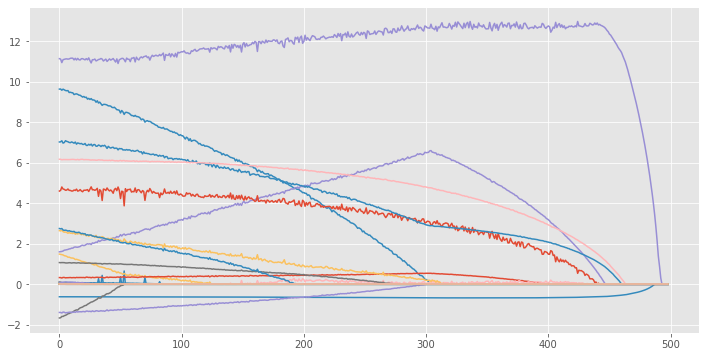

In [42]:
coefs_df_l1 = get_reg_coefs(X_train_scaled, y_train, X_train.columns, penalty="l1")

plot_reg_coefs(coefs_df_l1)

In [43]:
def get_important_features(coefs_df_l1, n_feats_limit):
    n_imp_feats = (coefs_df_l1!=0).sum(axis=1)
    index_imp_feats = n_imp_feats[n_imp_feats<=n_feats_limit].index[0]
    row_coef = coefs_df_l1.loc[index_imp_feats, :]
    return row_coef[row_coef!=0].index.tolist()

In [44]:
reg_important_9_features = get_important_features(coefs_df_l1, n_feats_limit=9)

reg_important_18_features = get_important_features(coefs_df_l1, n_feats_limit=18)

reg_important_9_features, reg_important_18_features

(['ac_000',
  'ag_004',
  'an_000',
  'bk_000',
  'bs_000',
  'by_000',
  'ci_000',
  'ck_000',
  'dt_000'],
 ['ac_000',
  'ag_003',
  'ag_004',
  'an_000',
  'ay_007',
  'az_005',
  'bk_000',
  'bs_000',
  'ca_000',
  'cb_000',
  'ci_000',
  'cj_000',
  'ck_000',
  'dc_000',
  'de_000',
  'di_000',
  'dt_000',
  'ee_006'])

In [45]:
def assess_data(data, df_quality, exp_name, verbose=False):
    X_train, X_test, y_train, y_test = data_split_train_test(data)
    X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

    model_LogR = LogisticRegression(solver="liblinear")
    model_LogR.fit(X_train_scaled, y_train)
    pred = model_LogR.predict(X_test_scaled)

    quality_list = quality_report(pred, y_test.values, verbose=verbose)
    
    df_quality.loc[exp_name, :] = quality_list
    
    return df_quality.round(3)

---

In [46]:
df_quality = assess_data(data_num_nan_free[["class"]+reg_important_9_features],
                         df_quality, exp_name="regularization_9", verbose=False)

df_quality

Train_shape: (53200, 9) Test shape: (22800, 9)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.969,0.812,0.963,0.881,0.966
corr & NaN processed,0.988,0.466,0.753,0.576,0.872
NaN processed,0.988,0.490,0.759,0.596,0.875
regularization_9,0.983,0.335,0.566,0.421,0.777


In [47]:
df_quality = assess_data(data_num_nan_free[["class"]+reg_important_18_features],
                         df_quality, exp_name="regularization_18", verbose=False)

df_quality

Train_shape: (53200, 18) Test shape: (22800, 18)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.969,0.812,0.963,0.881,0.966
corr & NaN processed,0.988,0.466,0.753,0.576,0.872
NaN processed,0.988,0.490,0.759,0.596,0.875
regularization_9,0.983,0.335,0.566,0.421,0.777
regularization_18,0.984,0.359,0.594,0.448,0.791


### Conclusion:
Сокращение количества признаков привело к ощутимой потере качества, но работать с 171-м признаком очень некомфортно и это сложно для имплементации модели.

## 2.8 Outlier data analysis

In [48]:
data_reg_18 = data_num_nan_free[["class"]+reg_important_18_features].copy()

In [49]:
data_reg_18.head()

,class,ac_000,ag_003,ag_004,an_000,ay_007,az_005,bk_000,bs_000,ca_000,cb_000,ci_000,cj_000,ck_000,dc_000,de_000,di_000,dt_000,ee_006
0,0,2.130706e+09,0.0,37250.0,4933296.0,703300.0,5526276.0,330760.0,178540.0,54064.0,638360.0,5245752.00,0.0,916567.68,5330690.0,1126.0,0.0,37928.0,339156.0
1,0,0.000000e+00,0.0,18254.0,2560898.0,1996924.0,1873902.0,341420.0,6700.0,115626.0,6900.0,2291079.36,0.0,643536.96,1743089.0,522.0,0.0,16254.0,133654.0
2,0,2.280000e+02,0.0,1648.0,2371990.0,239798.0,710672.0,137160.0,28000.0,22436.0,248240.0,2322692.16,0.0,236099.52,2341048.0,152.0,0.0,10534.0,320746.0
3,0,7.000000e+01,318.0,2212.0,10184.0,2038.0,2478.0,210720.0,10580.0,1994.0,21400.0,2135.04,0.0,4525.44,2578.0,62.0,0.0,18.0,10.0
4,0,1.368000e+03,0.0,43752.0,3230626.0,819596.0,3911734.0,306780.0,189000.0,61844.0,654700.0,3565684.80,0.0,379111.68,3590004.0,444.0,0.0,35154.0,286954.0


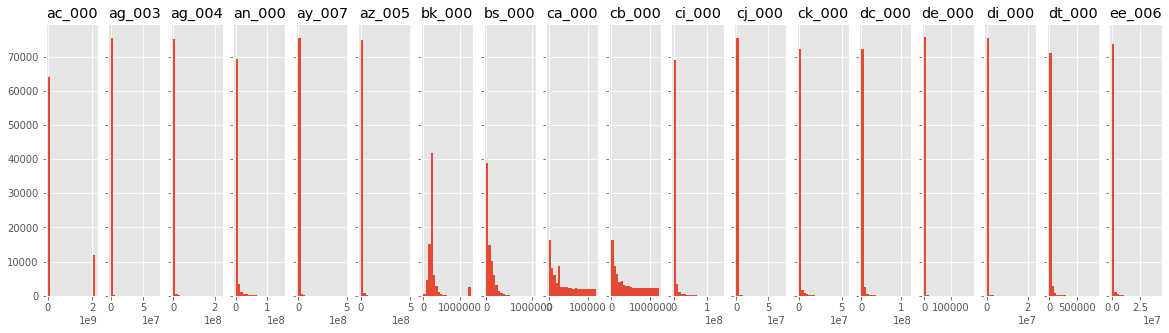

In [50]:
fig, ax = plt.subplots(1, len(reg_important_18_features),
                       sharey=True, figsize=(20, 5))
for i in range(len(reg_important_18_features)):
    f = reg_important_18_features[i]
    ax[i].set_title(f)
    ax[i].hist(data_reg_18[f], bins=20)
plt.show()

In [51]:
def outlier_detect_IQR(data, col, threshold=3):    
    IQR = data[col].quantile(0.95) - data[col].quantile(0.05)
    Lower_fence = data[col].quantile(0.01) - (IQR * threshold)
    Upper_fence = data[col].quantile(0.99) + (IQR * threshold)
    borders = (Lower_fence, Upper_fence)
    return borders

def outlier_detect_mean_std(data, col, threshold=3):
    Upper_fence = data[col].mean() + threshold * data[col].std()
    Lower_fence = data[col].mean() - threshold * data[col].std()   
    borders = (Lower_fence, Upper_fence)
    return borders

def windsorization(data, cols, borders_type="std", strategy='both'):
    data_copy = data.copy(deep=True)  
    for col in cols:
        if borders_type=="std":
            borders = outlier_detect_mean_std(data, col, threshold=3)
        elif borders_type=="iqr":
            borders = outlier_detect_IQR(data, col, threshold=3)
        
        if strategy == 'both':
            data_copy.loc[data_copy[col]>borders[1], col] = borders[1]
            data_copy.loc[data_copy[col]<borders[0], col] = borders[0]
        elif strategy == 'top':
            data_copy.loc[data_copy[col]>borders[1], col] = borders[1]
        elif strategy == 'bottom':
            data_copy.loc[data_copy[col]<borders[0], col] = borders[0]  
    return data_copy

In [52]:
data_reg_18_STD_outliers = windsorization(
    data_reg_18, cols=reg_important_18_features, borders_type="std", strategy='both')

data_reg_18_IQR_outliers = windsorization(
    data_reg_18, cols=reg_important_18_features, borders_type="iqr", strategy='both')

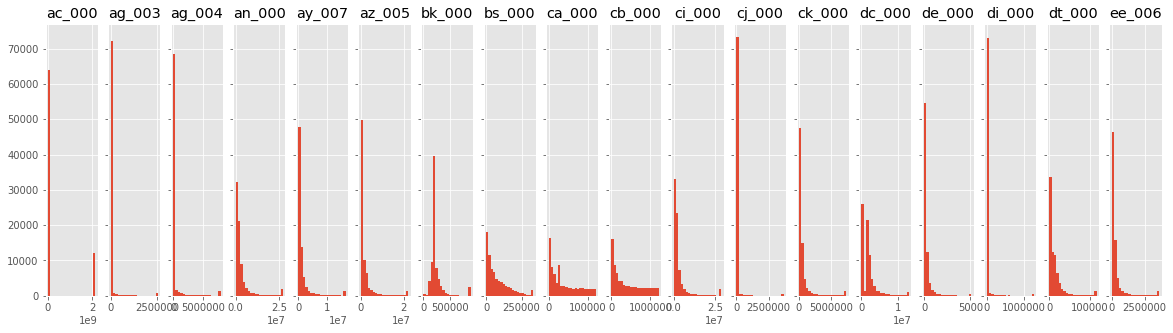

In [53]:
fig, ax = plt.subplots(1, len(reg_important_18_features),
                       sharey=True, figsize=(20, 5))
for i in range(len(reg_important_18_features)):
    f = reg_important_18_features[i]
    ax[i].set_title(f)
    ax[i].hist(data_reg_18_STD_outliers[f], bins=20)
plt.show()

In [54]:
df_quality = assess_data(data_reg_18_STD_outliers,
                         df_quality, exp_name="reg_18_outliers_std", verbose=False)

df_quality = assess_data(data_reg_18_IQR_outliers,
                         df_quality, exp_name="reg_18_outliers_iqr", verbose=False)

df_quality

Train_shape: (53200, 18) Test shape: (22800, 18)
Train_shape: (53200, 18) Test shape: (22800, 18)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.969,0.812,0.963,0.881,0.966
corr & NaN processed,0.988,0.466,0.753,0.576,0.872
NaN processed,0.988,0.490,0.759,0.596,0.875
regularization_9,0.983,0.335,0.566,0.421,0.777
regularization_18,0.984,0.359,0.594,0.448,0.791
reg_18_outliers_std,0.984,0.420,0.595,0.492,0.792
reg_18_outliers_iqr,0.986,0.488,0.674,0.566,0.833


### Conclusion:
Обработка выбросов по процентилям значительно улучшила показатели метрик.

## 2.9 Variable conversion

### 2.9.1 Variable *ac_000*

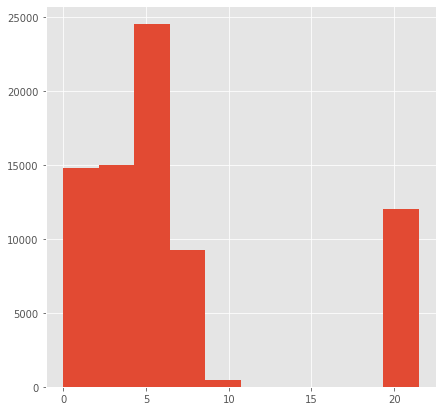

In [57]:
plt.figure(figsize=(7, 7))
dt=data_reg_18_IQR_outliers.copy()
dt.ac_000=dt.ac_000.apply(np.log)
dt=dt.replace([np.inf, -np.inf], np.nan)
dt=dt.fillna(0.0)
dt['ac_000'].hist()

In [58]:
data_reg_18_IQR_outliers_log=dt.copy()

### 2.9.2 Variable *de_000*

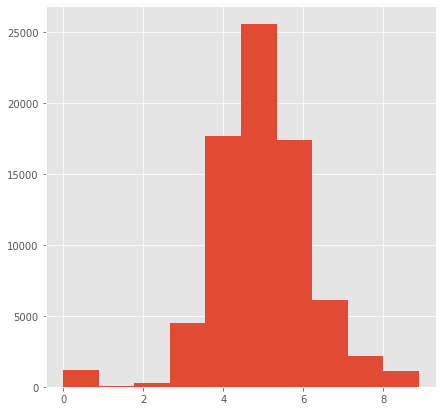

In [59]:
plt.figure(figsize=(7, 7))
dt=data_reg_18_IQR_outliers.copy()
dt.de_000=dt.de_000.apply(np.log)
dt=dt.replace([np.inf, -np.inf], np.nan)
dt=dt.fillna(0.0)
dt['de_000'].hist()

In [60]:
data_reg_18_IQR_outliers_log=dt.copy()

In [61]:
df_quality = assess_data(data_reg_18_IQR_outliers_log,
                         df_quality, exp_name="reg_18_outliers_iqr_log", verbose=False)

Train_shape: (53200, 18) Test shape: (22800, 18)


In [62]:
df_quality

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.969,0.812,0.963,0.881,0.966
corr & NaN processed,0.988,0.466,0.753,0.576,0.872
NaN processed,0.988,0.490,0.759,0.596,0.875
regularization_9,0.983,0.335,0.566,0.421,0.777
regularization_18,0.984,0.359,0.594,0.448,0.791
reg_18_outliers_std,0.984,0.420,0.595,0.492,0.792
reg_18_outliers_iqr,0.986,0.488,0.674,0.566,0.833
reg_18_outliers_iqr_log,0.987,0.488,0.681,0.569,0.836


### Conclusion:
Логарифмирование 2-х переменных позволило немного улучшить показатели метрик.

## 2.10 Class imbalance correction
### SMOTE (Synthetic Minority Over-sampling Technique)

In [64]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [65]:
X_train, X_test, y_train, y_test = data_split_train_test(data_reg_18_IQR_outliers_log)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

Train_shape: (53200, 18) Test shape: (22800, 18)


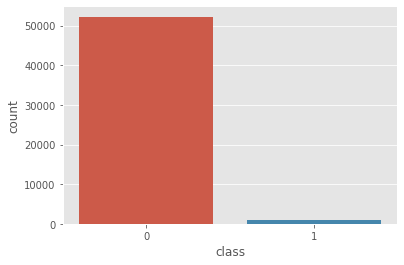

In [66]:
sns.countplot(x='class',data=pd.DataFrame(y_train))

In [67]:
X_train_sampled, y_train_sampled = SMOTE().fit_sample(X_train_scaled, y_train)

In [68]:
X_train_scaled.shape, X_train_sampled.shape

((53200, 18), (104474, 18))

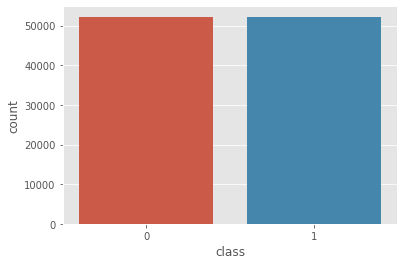

In [69]:
sns.countplot(x='class',data=pd.DataFrame(y_train_sampled))

In [70]:
model_LogR = LogisticRegression(solver="liblinear")
model_LogR.fit(X_train_sampled, y_train_sampled)
pred = model_LogR.predict(X_test_scaled)

quality_list = quality_report(pred, y_test.values, verbose=False)

df_quality.loc['reg_10_outliers_std_log_balance', :] = quality_list

df_quality= df_quality.round(3)

df_quality

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.969,0.812,0.963,0.881,0.966
corr & NaN processed,0.988,0.466,0.753,0.576,0.872
NaN processed,0.988,0.490,0.759,0.596,0.875
regularization_9,0.983,0.335,0.566,0.421,0.777
regularization_18,0.984,0.359,0.594,0.448,0.791
reg_18_outliers_std,0.984,0.420,0.595,0.492,0.792
reg_18_outliers_iqr,0.986,0.488,0.674,0.566,0.833
reg_18_outliers_iqr_log,0.987,0.488,0.681,0.569,0.836
reg_10_outliers_std_log_balance,0.966,0.925,0.335,0.492,0.667


### Conclusion:
##### В качестве метода исправляющего дисбаланс классов, была выбрана передискретизация, так как дисбаланс очень существенный и если применить децимацию, то от датасета ничего не останется.
##### Значения всех метрик кроме *Precision* значительно уменьшились

---

# 3. Conclusion

* Самый лучший результат показало просто выбрасывание Nan-ов, но этот результат нельзя считать объективным, так как выборка получилась слишком маленькой.
* Корреляционный анализ оказался в общем бесполезным, поскольку количество коэффициентов удалось сократить за счет регуляризации и выбрасывание признаков с большим количеством Nan-ов.
* Преобразование переменных и работа с выбросами дали очень хороший результат.
* Устранение дисбаланса классов за счет передискретизации, позволило повысить *Precision* за счет всех остальных метрик. Если стоит цель именно повышение точности, то эту модификацию можно оставить. Во всех остальных случаях, лучше оставить как есть.